In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('Zomato data .csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# 1) TYPES OF RESTURANT 

Text(0.5, 0, 'Types of Returant')

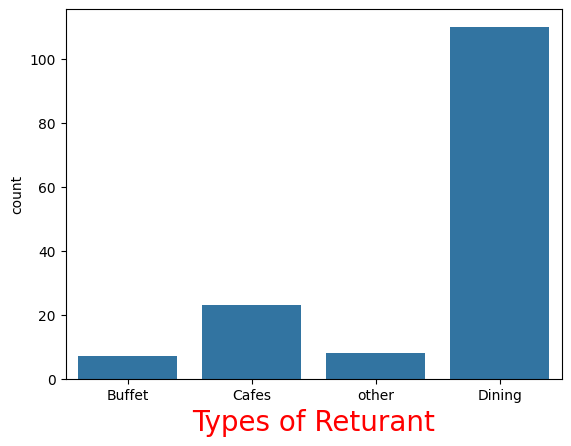

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Types of Returant",c="red",size=20)

# Conlusion : Majority of the resturant falls in Dining category

# 2) VOTES THAT RESTURANT HAS RECIEVED 

Text(0, 0.5, 'Votes')

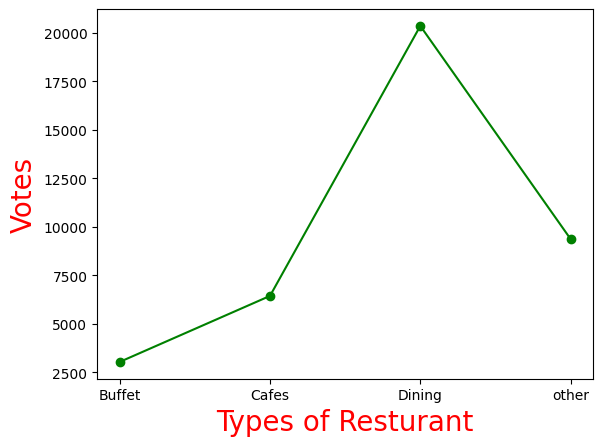

In [9]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Types of Resturant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

# Conclusion : Dining Resturant has received maximum votes

# 3) RATINGS' DISTRIBUTION

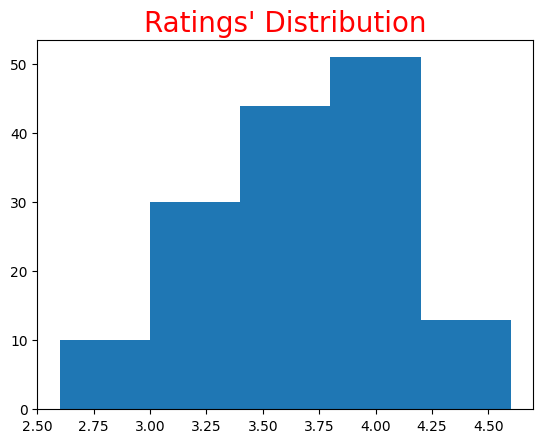

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings' Distribution",c="red",size=20)
plt.show()

# The majority resturant received ratings from 3.5 to 4.25

# 4) AVERAGE ORDER SPENDING BY COUPLES 

Text(0.5, 0, 'Spending by couples')

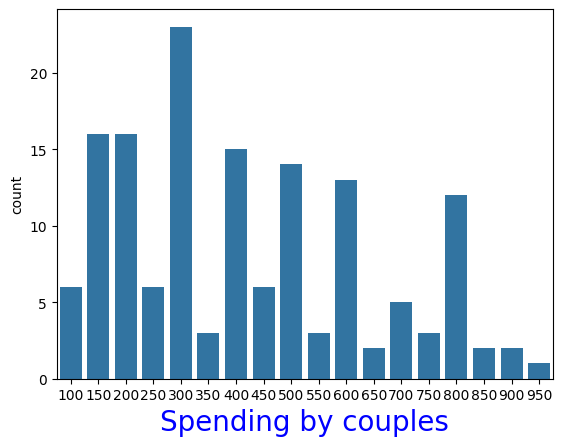

In [17]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel("Spending by couples",c="blue",size=20)

# Conslusion: The majority of couples preferr resturant with an approximate cost of 300 rupees

# 5) WHICH MODE RECIEVES MAXIMUM RAITNGS 

<Axes: xlabel='online_order', ylabel='rate'>

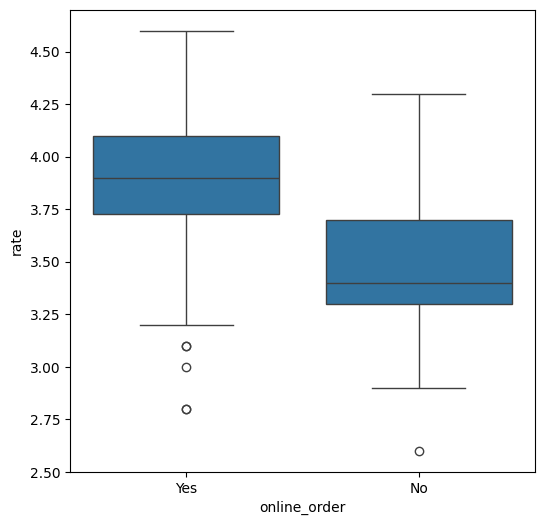

In [22]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order", y = "rate", data = dataframe)

# Conlusion: Offline order received lower ratings in comparison to onlie order 

# 6) Which types of resturant received more offline orders 

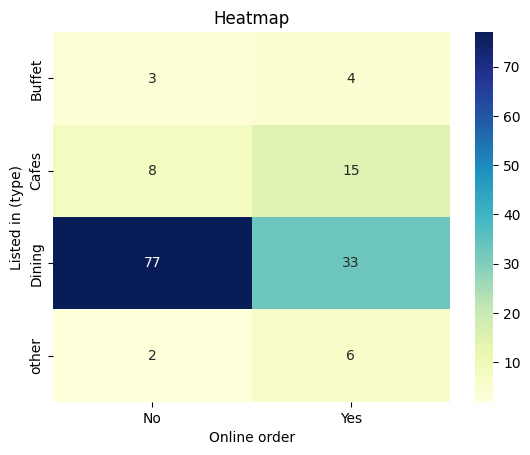

In [29]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns = 'online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot = True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed in (type)")
plt.show()

# Conlusion: Dining resturants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at resturants, but prefer online ordering at cafes. 